# Assignment Brief: Neural Networks in PyTorch for Machine Learning  

## Deadline: 01 November 2024, 14:00 GMT

## Number of marks available: 10

In this practical, we will practice using PyTorch to build a neural network to carry out the MNIST classification tasks, specifically writing the optimiser classes needed to train the network.

### Please READ the whole assignment first, before starting to work on it.

### How and what to submit

A. A **Jupyter Notebook** with the code in all the cells executed and outputs displayed, together with your saved models and training logs (the text output from the `train()` function). The training logs can be included in the final, executed notebook, or saved separately as a `.txt` file.

B. Name your Notebook **COM61011_AssignmentA2_XXXXXX.ipynb** where XXXXXX is your username such as such as abc18de. Example: `COM61011_AssignmentA2_abc18de.ipynb`

C. Upload the Jupyter Notebook in B to Blackboard under the **Group A: Computing Assignment 2** submission area before the deadline. **There are two submissions: please pay close attention to submit to the right place!**

D. **NO DATA UPLOAD**: Please do not upload the data files used in this Notebook. We have a copy already.


### Running this code

By default, this code requires a GPU with software called "CUDA" to run. If you do not have a CUDA-enabled GPU, you can run this code on Google Colab. You can also set the `device` variable to `cpu` to run this code on your CPU, but it may be very slow.


### Assessment Criteria

* Successful implementation, from scratch, of various optimisers and weight update equations.

* Being able to write an optimiser class that functions within a PyTorch training loop.

* Being able to successfully train a neural network using PyTorch and save the resulting model.


### Code quality and use of Python libraries
When writing your code, you will find out that there are operations that are repeated at least twice. If your code is unreadable, we may not award marks for that section. Make sure to check the following:

* Did you include Python functions to solve the question and avoid repeating code?
* Did you comment your code to make it readable to others?

**DO NOT USE the import `torch.optim` for the questions on this assignment. You are meant to write Python code from scratch. Using pre-built optimisers for the questions on this assignment will give ZERO marks. No excuse will be accepted.**

Furthermore, please try to avoid using any imports apart from the ones already provided in the Notebook. You can easily install all recommended modules for this assignment by running the following command in your terminal: `python -m pip install -r requirements.txt`


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 10% of the mark each 24 hours the work is late after the deadline. NO late submission will be marked one week after the deadline. Please read [this link](https://wiki.cs.manchester.ac.uk/index.php/UGHandbook23:Main#Late_Submission_of_Coursework_Penalty).

### Use of unfair means

**Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations.** Please carefully read [what constitutes Unfair Means](https://documents.manchester.ac.uk/display.aspx?DocID=2870) if not sure. If you still have questions, please ask your Personal tutor or the Lecturers.

-----------------------------------

# Background: Optimisers in Deep Learning
A key component of deep learning is the iterative weight update equation, often called an optimiser. The optimiser is responsible for updating the weights of the network in order to minimise the loss function, and the choice of optimiser can have a significant impact on the performance of the model. In this coursework, you will be implement from scratch some popular optimisers and compare their performance in a simple neural network classifying the MNIST dataset.

**Task**: to implement the following optimisers for MNIST classification tasks: **AdaGrad** (Adaptive gradient), **RMSProp** (Root mean square propagation), and **Adam** (Adaptive moments).

**Data**: MNIST dataset, which contains 60,000 training images and 10,000 testing images of handwritten digits.


### Optimiser recap
We first have a quick recap of the basic ideas in each of the optimisers.  

* Stochastic gradient descent (one data point at a time):
    $$ \begin{align*}
        w^{(\tau)} &= w^{(\tau-1)} + \Delta w^{(\tau-1)}, \\
        \Delta w^{(\tau-1)} &= - \eta \nabla E_{n}(w^{\tau-1})
    \end{align*} $$

* SGD with momentum:
    $$\begin{align*}
        w^{(\tau)} &= w^{(\tau-1)} + \Delta w^{(\tau-1)}, \\
        \Delta w^{(\tau-1)} &= - \eta \left[\nabla E_{n}(w^{\tau-1}) + \mu \Delta w^{(\tau-2)}\right]
    \end{align*} $$
    where $\mu$ ('mu') is called the *momentum parameter*.

* AdaGrad (Adaptive gradient): to reduce each learning rate by using the accumulated sum of squared gradients
$$    \begin{align*}
        r_i^{(\tau)} &= r_i^{(\tau-1)} + \left(\frac{\partial E(w)}{\partial w_i}\right)^2, \\
        w_i^{(\tau)} &= w_i^{(\tau-1)} - \frac{\eta}{\sqrt{r_i^{(\tau)}} + \epsilon}\frac{\partial E(w)}{\partial w_i}
    \end{align*} $$

* RMSProp (Root mean square propagation): moving average of the squared gradient
    $$ \begin{align*}
        r_i^{(\tau)} &= \beta r_i^{(\tau-1)} + (1-\beta) \left(\frac{\partial E(w)}{\partial w_i}\right)^2, \\
        w_i^{(\tau)} &= w_i^{(\tau-1)} - \frac{\eta}{\sqrt{r_i^{(\tau)}} + \epsilon}\frac{\partial E(w)}{\partial w_i}
    \end{align*}$$
    where $\beta$ ('beta') is called the *decay rate* of the moving average.

* Adam (Adaptive moments): moving average for both the gradient and the squared gradient
    $$ \begin{align*}
        s_i^{(\tau)} &= \beta_1 s_i^{(\tau-1)} + (1-\beta_1) \frac{\partial E(w)}{\partial w_i}, \\
        r_i^{(\tau)} &= \beta_2 r_i^{(\tau-1)} + (1-\beta_2) \left(\frac{\partial E(w)}{\partial w_i}\right)^2 \\
        \hat{s_i}^{(\tau)} &= \frac{s_i^{(\tau)}}{1-\beta_1^{\tau}}, \\
        \hat{r_i}^{(\tau)} &= \frac{r_i^{(\tau)}}{1-\beta_2^{\tau}}, \\
        w_i^{(\tau)} &= w_i^{(\tau-1)} - \frac{\eta}{\sqrt{\hat{r_i}^{(\tau)}} + \epsilon}\hat{s_i}^{(\tau)}
    \end{align*}$$
    where $\beta_1, \beta_2$ are the *decay rates* of the moving averages, and with $\beta_1^{\tau}, \beta_2^{\tau}$ we denote $\beta_1, \beta_2$ to the power $\tau$.

In all cases, $\eta$ is the learning rate, and $\epsilon$ is a small number to avoid division by zero improve numerical stability.

### Hyperparameter settings

In your implementations, please use the following hyperparameter setups: $\epsilon=1e-6$, $\mu=0.9$, $\eta=0.01$, $\beta=0.99$, $\beta_1=0.9$, $\beta_2=0.99$. (DO NOT CHANGE ANY OF THEM)

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# import torch.optim as optim (this is NOT allowed; you can't use torch optimizers)
from torchvision import datasets, transforms

batch_size = 64
test_batch_size = 1000
lr = 0.001
seed = 10

device = torch.device("cuda")

train_kwargs = {'batch_size': batch_size}
test_kwargs = {'batch_size': test_batch_size}

and the following convnet:

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

We also provide the test function to report the test accuracy.

In [11]:
# for test accuracy report
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

# Dataset

MNIST is a well-known dataset of images of handwritten digits. A copy of the MNIST dataset is included in PyTorch. We will download it, then load it into memory using the `torchvision` module.

In [12]:
# The values 0.1307 and 0.3081 used for the Normalize() transformation below are the global mean and standard
# deviation of the MNIST dataset. This is equivalent to scaling all pixel values between [0, 1].
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
dataset1 = datasets.MNIST('./data', train=True, download=True, transform=transform)
dataset2 = datasets.MNIST('./data', train=False, transform=transform)

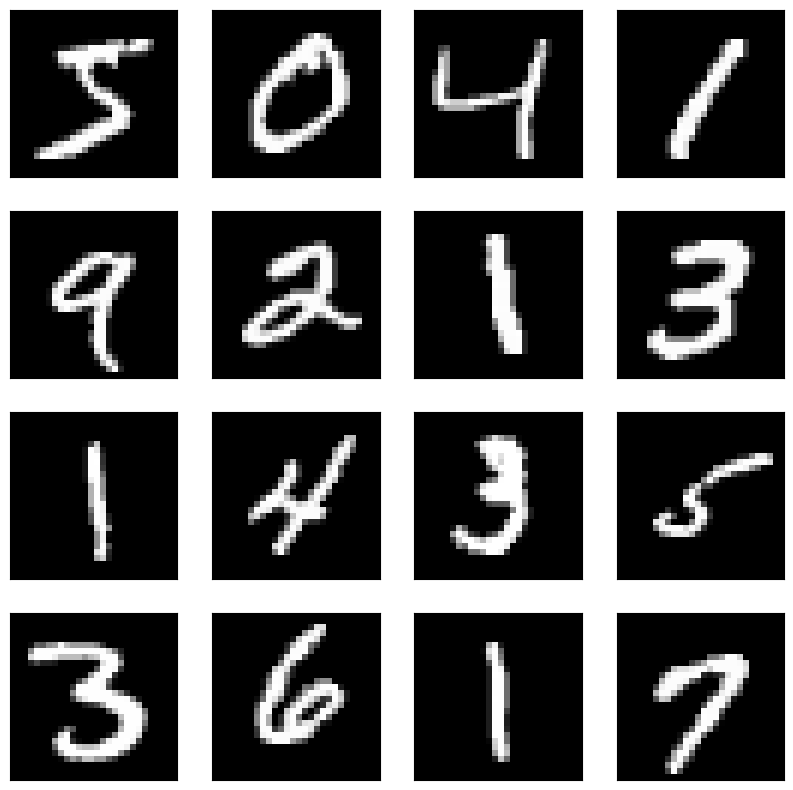

In [13]:
import matplotlib.pyplot as plt
# Visualize the first 16 elements of the training set
fig = plt.figure(figsize=(10, 10))
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.imshow(dataset1.data[i], cmap='gray')

# Implementations (7 marks)
In PyTorch, optimisers are created by passing the model parameters and hyperparameters to the optimiser class. The optimiser is then used to update the model parameters after each forward pass. Following this convension, we will write our optimisers as *classes*, an example structure for which is given below. Feel free to add whatever parameters or class functions that you see fit.

Implement the optimisers **AdaGrad** (Adaptive gradient), **RMSProp** (Root mean square propagation), and **Adam** (Adaptive moments) below.

In [14]:
class adagrad_optimizer():
    def __init__(self, model, lr=0.001, epsilon=1e-6):
        self.model = model
        self.lr = lr
        self.epsilon = epsilon
        self.squared_gradients = [torch.zeros_like(p) for p in model.parameters()]

    # The Adagrad optimizer adjusts the learning rate based on the cumulative sum of squared gradients for each parameter. This helps reduce the learning rate for parameters with frequently occurring features, while parameters associated with infrequent features get larger updates.
    def step(self):
        for i, param in enumerate(self.model.parameters()):
            if param.grad is None:
                continue

            self.squared_gradients[i] += param.grad.data ** 2 # Accumulating  the squared gradients

            adjusted_lr = self.lr / (self.squared_gradients[i].sqrt() + self.epsilon)  # Updating the parameters
            param.data -= adjusted_lr * param.grad.data

    def zero_grad(self):
        for param in self.model.parameters():
            if param.grad is not None:
                param.grad.detach_()
                param.grad.zero_()

class rmsprop_optimizer():
    def __init__(self, model, lr=0.001, beta=0.99, epsilon=1e-6):
        self.model = model
        self.lr = lr
        self.beta = beta
        self.epsilon = epsilon
        self.squared_avg = [torch.zeros_like(p) for p in model.parameters()]

        #RMSprop addresses some issues with Adagrad by using an exponentially decaying average of squared gradients rather than accumulating all past squared gradients. This results in more stable updates and mitigates the excessive decay of learning rates seen in Adagrad.
    def step(self):
        for i, param in enumerate(self.model.parameters()):
            if param.grad is None:
                continue

            self.squared_avg[i] = self.beta * self.squared_avg[i] + (1 - self.beta) * param.grad.data ** 2 # Updating  running average of squared gradients

            adjusted_lr = self.lr / (self.squared_avg[i].sqrt() + self.epsilon) # Updating parameters
            param.data -= adjusted_lr * param.grad.data

    def zero_grad(self):
        for param in self.model.parameters():
            if param.grad is not None:
                param.grad.detach_()
                param.grad.zero_()

class adam_optimizer():
    def __init__(self, model, lr=0.001, beta1=0.9, beta2=0.99, epsilon=1e-6):
        self.model = model
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = [torch.zeros_like(p) for p in model.parameters()]  # First moment vector
        self.v = [torch.zeros_like(p) for p in model.parameters()]  # Second moment vector
        self.t = 0  # Time step

        # The Adam optimizer combines concepts from both RMSprop and momentum. It uses two moving averages: one for the gradient (first moment) and another for the squared gradient (second moment). It also corrects for the initialization bias in these averages by computing bias-corrected estimates.

    def step(self):
        self.t += 1
        for i, param in enumerate(self.model.parameters()):
            if param.grad is None:
                continue

            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * param.grad.data # Update biased first moment estimate

            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * param.grad.data ** 2 # Update biased second raw moment estimate

            m_hat = self.m[i] / (1 - self.beta1 ** self.t) # Correct bias in first and second moment
            v_hat = self.v[i] / (1 - self.beta2 ** self.t)
            # Update parameters
            param.data -= self.lr * m_hat / (v_hat.sqrt() + self.epsilon)

    def zero_grad(self):
        for param in self.model.parameters():
            if param.grad is not None:
                param.grad.detach_()
                param.grad.zero_()

In [15]:
def train(log_interval, model, device, train_loader, test_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()  # Clear previous gradients
        output = model(data)   # Forward pass
        loss = F.nll_loss(output, target)  # Compute loss
        loss.backward()  # Backpropagation to compute gradients

        optimizer.step()  # Update parameters

        if batch_idx % log_interval == 0:
            print(f'Train: [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
            test(model, device, test_loader)

# Model training and submission (3 marks)

Use the following training settings for your model training. You may have to run this code multiple times, or create a loop, to train the model with different optimisers.

In [16]:
cuda_kwargs = {'num_workers': 1, 'pin_memory': True, 'shuffle': True}
train_kwargs.update(cuda_kwargs)
test_kwargs.update(cuda_kwargs)
train_loader = torch.utils.data.DataLoader(dataset1, **train_kwargs)
test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

# Instantiate model
model = Net().to(device)
log_interval = 10

# Training with different optimizers
for optimizer_name, optimizer_class in [("adagrad", adagrad_optimizer), ("rmsprop", rmsprop_optimizer), ("adam", adam_optimizer)]:
    model = Net().to(device)  # Re-initialize model for each optimizer
    optimizer = optimizer_class(model)  # Instantiate optimizer
    train(log_interval, model, device, train_loader, test_loader, optimizer)
    torch.save(model.state_dict(), f"mnist_cnn_{optimizer_name}.pt")

Train: [0/60000 (0%)]	Loss: 2.302889

Test set: Average loss: 2.2501, Accuracy: 2252/10000 (23%)

Train: [640/60000 (1%)]	Loss: 1.003245

Test set: Average loss: 1.0554, Accuracy: 6924/10000 (69%)

Train: [1280/60000 (2%)]	Loss: 0.774821

Test set: Average loss: 0.6260, Accuracy: 8484/10000 (85%)

Train: [1920/60000 (3%)]	Loss: 0.540468

Test set: Average loss: 0.5246, Accuracy: 8587/10000 (86%)

Train: [2560/60000 (4%)]	Loss: 0.375651

Test set: Average loss: 0.4599, Accuracy: 8662/10000 (87%)

Train: [3200/60000 (5%)]	Loss: 0.501221

Test set: Average loss: 0.4289, Accuracy: 8826/10000 (88%)

Train: [3840/60000 (6%)]	Loss: 0.545869

Test set: Average loss: 0.4046, Accuracy: 8900/10000 (89%)

Train: [4480/60000 (7%)]	Loss: 0.347474

Test set: Average loss: 0.3909, Accuracy: 8885/10000 (89%)

Train: [5120/60000 (9%)]	Loss: 0.384817

Test set: Average loss: 0.3384, Accuracy: 9082/10000 (91%)

Train: [5760/60000 (10%)]	Loss: 0.235890

Test set: Average loss: 0.3240, Accuracy: 9102/10000 

After running through the model i've got the following results :


adgrad_optimizer is giving Accuracy of 96%

rmsprop_optimizer is giving Accuracy of 98%

adam_optimizer is giving Accuracy of 98 %